In [15]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np


Load the MNIST dataset

In [ ]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

Visualize the dataset

Target labels:  [3 0 8 2 6 4 4 7 3 9]


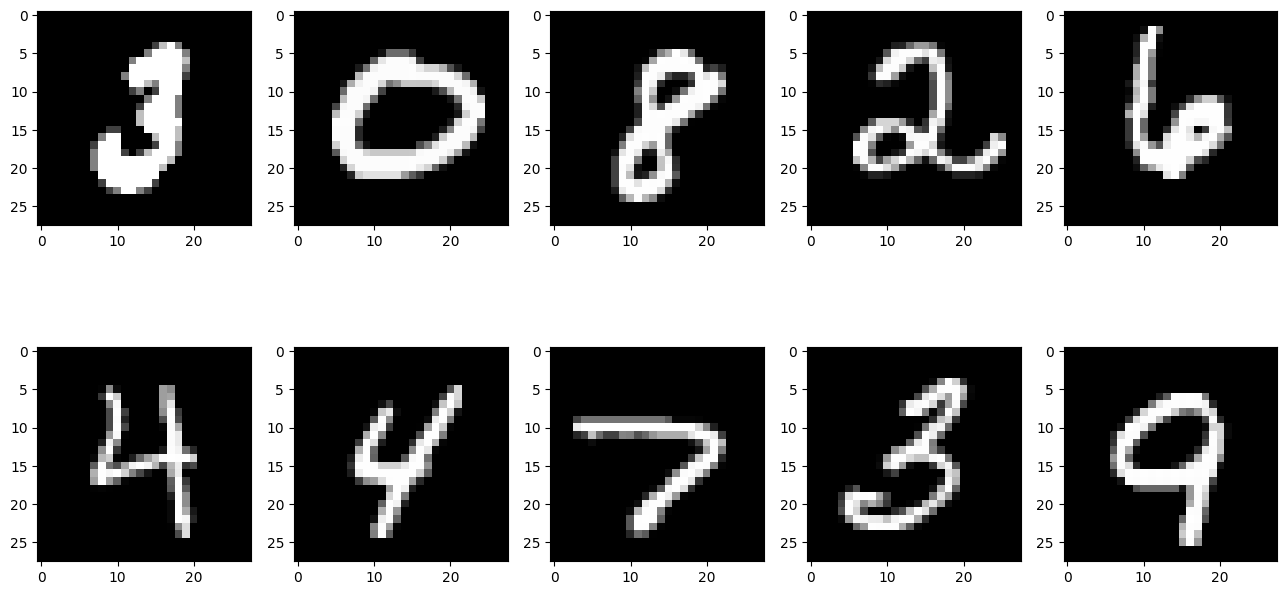

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [ ]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [16]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(64,activation='relu'))
model.add(Dense(64,input_dim=64,activation='relu'))
model.add(Dense(32,input_dim=64,activation='relu'))
model.add(Dense(32,input_dim=64,activation='relu'))
model.add(Dense(10,input_dim=32,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                50240     
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 32)                1056      
                                                                 
 dense_8 (Dense)             (None, 10)                330       
                                                                 
Total params: 57,866
Trainable params: 57,866
Non-trai

Train the model

In [19]:
train_info = model.fit(new_train_data , new_train_target , epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2778 - accuracy: 0.9173
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1276 - accuracy: 0.9611
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0961 - accuracy: 0.9701
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0757 - accuracy: 0.9758
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0648 - accuracy: 0.9797
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0558 - accuracy: 0.9822
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0486 - accuracy: 0.9840
Epoch 8/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0423 - accuracy: 0.9863
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0385 - accuracy: 0.9875
Epoch 10/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.036

Plot the loss and accuracy graphs

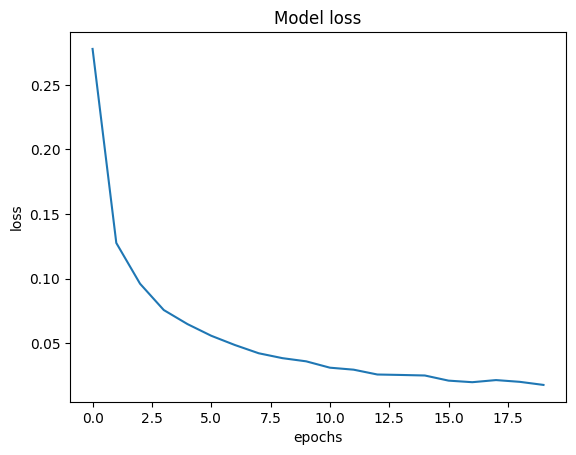

In [21]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

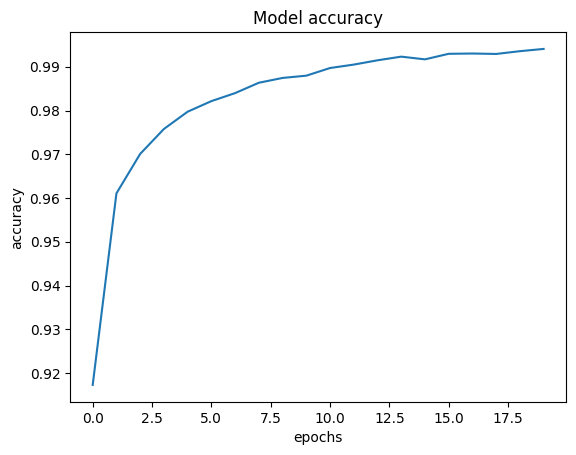

In [22]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [24]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 [==============================] - 1s 2ms/step - loss: 0.1168 - accuracy: 0.9779
Loss of the Test dataset is: 0.11680120974779129
Accuracy of the test dataset is: 0.9779000282287598


Save the model weights

In [25]:
model.save_weights('MNIST_WEIGHTS_V1.h5')

Visualizing

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

313/313 [==============================] - 1s 3ms/step


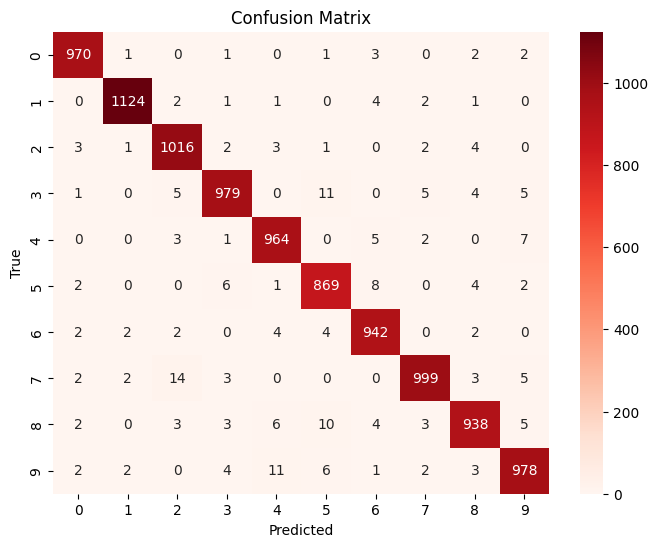

In [34]:
predicted_labels = np.argmax(model.predict(new_test_data), axis=1)

cm = confusion_matrix(test_target, predicted_labels)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()